In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras_tuner as kt


In [3]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()
img_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

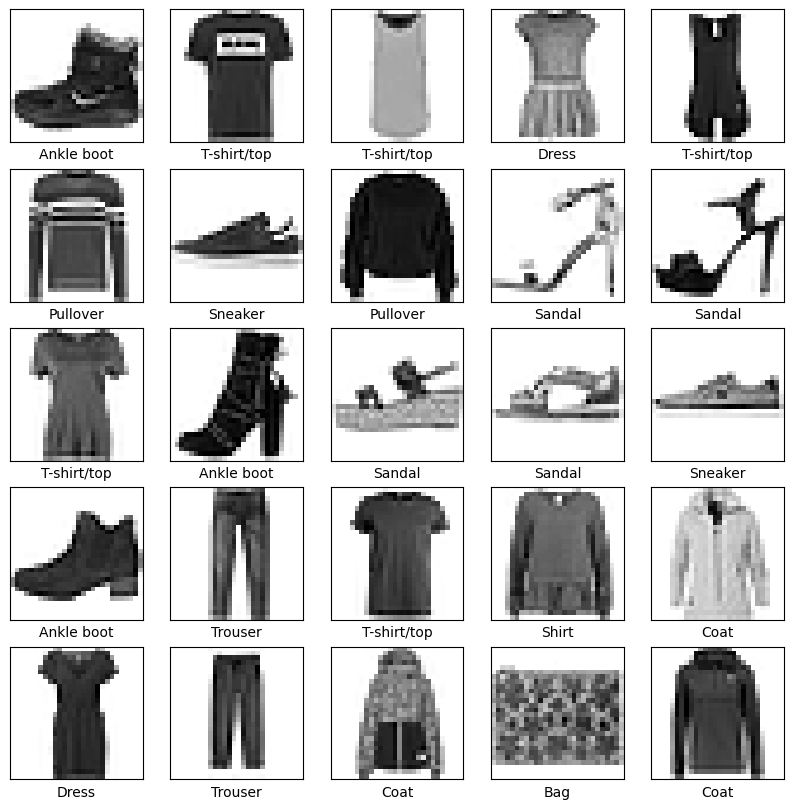

In [4]:
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_images(img_train, label_train, class_names)

In [5]:
# normalize the data
img_train = img_train / 255.0
img_test = img_test / 255.0


In [6]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])
    return model

In [7]:
turner = kt.Hyperband(
    build_model, # La construe la red neuronal
    objective='val_accuracy', # La función objetivo
    max_epochs=10, # El número máximo de épocas
    factor=3, # El factor de reducción de la cantidad de modelos
    directory='test_turner', # El directorio donde se guardan los resultados
    project_name='intro_to_kt' # El nombre del proyecto
)

In [8]:
turner.search(
    img_train,
    label_train,
    epochs=10,
    validation_split=0.2,
    validation_data=(img_test, label_test)
)

Trial 27 Complete [00h 01m 11s]
val_accuracy: 0.6855999827384949

Best val_accuracy So Far: 0.8367999792098999
Total elapsed time: 00h 13m 50s
INFO:tensorflow:Oracle triggered exit


In [9]:
best_hps = turner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)
print(f"units: {best_hps.get('units')}, learning_rate: {best_hps.get('learning_rate')}")

units: 352, learning_rate: 0.01


In [10]:
model=turner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=10, validation_data=(img_test, label_test))


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6237 - accuracy: 0.8044 - val_loss: 0.6316 - val_accuracy: 0.7911
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5792 - accuracy: 0.8245 - val_loss: 0.6619 - val_accuracy: 0.8054
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5684 - accuracy: 0.8281 - val_loss: 0.6621 - val_accuracy: 0.8107
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5368 - accuracy: 0.8349 - val_loss: 0.6962 - val_accuracy: 0.8084
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5555 - accuracy: 0.8347 - val_loss: 0.6833 - val_accuracy: 0.8039
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5595 - accuracy: 0.8349 - val_loss: 0.6856 - val_accuracy: 0.7977
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5463 - accuracy: 0.8384 - val_loss: 0.6102 - val_accuracy:

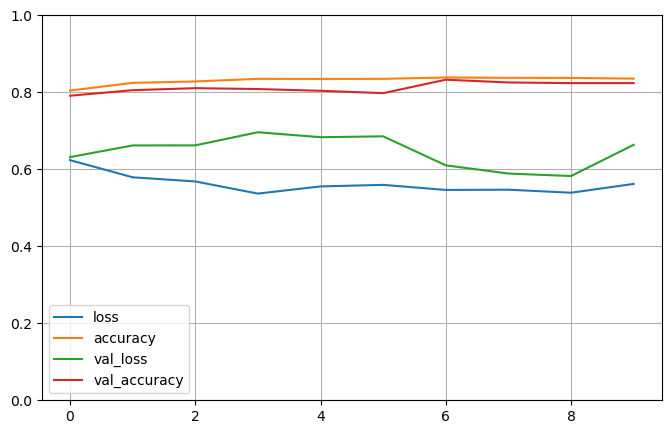

In [11]:
pd.DataFrame(data=history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
